# Notebook #4: Estandización

In [ ]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import pickle

# Feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer, StandardScaler

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_scaling as ss

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
df = pd.read_pickle('../datos/pickles_transformados/modelo1/df_sinoutliers.pkl')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,0.16162790697674417,0.16162790697674417,6,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,...,1.0,0.16162790697674417,1,0,0,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417
1,31,1,0.16162790697674417,0.16162790697674417,10,0.16162790697674417,0.08081395348837209,0.08081395348837209,0.08081395348837209,0.16162790697674417,...,6.0,0.16162790697674417,5,1,4,0.08081395348837209,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417
2,32,0,0.5808139534883721,0.5808139534883721,17,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,...,5.0,0.16162790697674417,5,0,3,0.16162790697674417,0.5808139534883721,0.16162790697674417,0.08081395348837209,0.08081395348837209
3,38,0,0.16162790697674417,0.3872093023255814,2,0.16162790697674417,0.3872093023255814,0.08081395348837209,0.16162790697674417,0.16162790697674417,...,13.0,0.16162790697674417,8,7,5,0.16162790697674417,0.08081395348837209,0.16162790697674417,0.5808139534883721,0.05387596899224806
4,32,0,0.08081395348837209,0.29040697674418603,10,0.5808139534883721,0.16162790697674417,0.05387596899224806,0.3872093023255814,0.08081395348837209,...,9.0,0.08081395348837209,6,0,4,0.08081395348837209,0.16162790697674417,0.08081395348837209,0.05387596899224806,0.04040697674418604


In [7]:
col_numericas = df.select_dtypes(include=np.number).columns
col_numericas

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [8]:
df_escaladores_graf = ss.aplicar_escaladores(df, ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], [RobustScaler(), MinMaxScaler(), StandardScaler(), Normalizer()])

In [9]:
df_escaladores_graf

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,YearsWithCurrManager_standard,Age_normalizer,DistanceFromHome_normalizer,MonthlyIncome_normalizer,NumCompaniesWorked_normalizer,PercentSalaryHike_normalizer,TotalWorkingYears_normalizer,YearsAtCompany_normalizer,YearsSinceLastPromotion_normalizer,YearsWithCurrManager_normalizer
0,51,0,0.16162790697674417,0.16162790697674417,6,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,...,-1.163816,0.000389,0.000046,1.000000,0.000008,0.000084,0.000008,0.000008,0.000000,0.000000
1,31,1,0.16162790697674417,0.16162790697674417,10,0.16162790697674417,0.08081395348837209,0.08081395348837209,0.08081395348837209,0.16162790697674417,...,-0.018559,0.000740,0.000239,1.000000,0.000000,0.000549,0.000143,0.000119,0.000024,0.000095
2,32,0,0.5808139534883721,0.5808139534883721,17,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,...,-0.304873,0.000166,0.000088,1.000000,0.000005,0.000078,0.000026,0.000026,0.000000,0.000016
3,38,0,0.16162790697674417,0.3872093023255814,2,0.16162790697674417,0.3872093023255814,0.08081395348837209,0.16162790697674417,0.16162790697674417,...,0.267756,0.000457,0.000024,1.000000,0.000036,0.000132,0.000156,0.000096,0.000084,0.000060
4,32,0,0.08081395348837209,0.29040697674418603,10,0.5808139534883721,0.16162790697674417,0.05387596899224806,0.3872093023255814,0.08081395348837209,...,-0.018559,0.001366,0.000427,0.999999,0.000171,0.000512,0.000384,0.000256,0.000000,0.000171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,0,0.15102121034032712,0.151731721215143,4,0.1551866035371118,0.12726425277205378,0.15345001614987078,0.1761598130006253,0.1374131682271217,...,0.267756,0.000819,0.000113,0.999999,0.000028,0.000509,0.000170,0.000170,0.000028,0.000141
4405,42,0,0.15097166269913934,0.15798988517182772,5,0.15780773599569559,0.16091162107707543,0.15336126541756895,0.15769723285251694,0.18412296613152124,...,-0.591187,0.000697,0.000083,1.000000,0.000050,0.000282,0.000166,0.000050,0.000000,0.000033
4406,29,0,0.15092214755886413,0.15793358086492398,2,0.15767262663268558,0.1607935641283762,0.16744321833669784,0.1575974876071959,0.1615894549034084,...,-0.591187,0.001082,0.000075,0.999999,0.000075,0.000560,0.000373,0.000112,0.000000,0.000075
4407,25,0,0.15087266488753334,0.15787731667508967,25,0.18876110450970407,0.16713568964154968,0.16737806533345398,0.17604710678629348,0.16962513379390873,...,-0.591187,0.000675,0.000675,0.999999,0.000000,0.000540,0.000135,0.000108,0.000027,0.000054


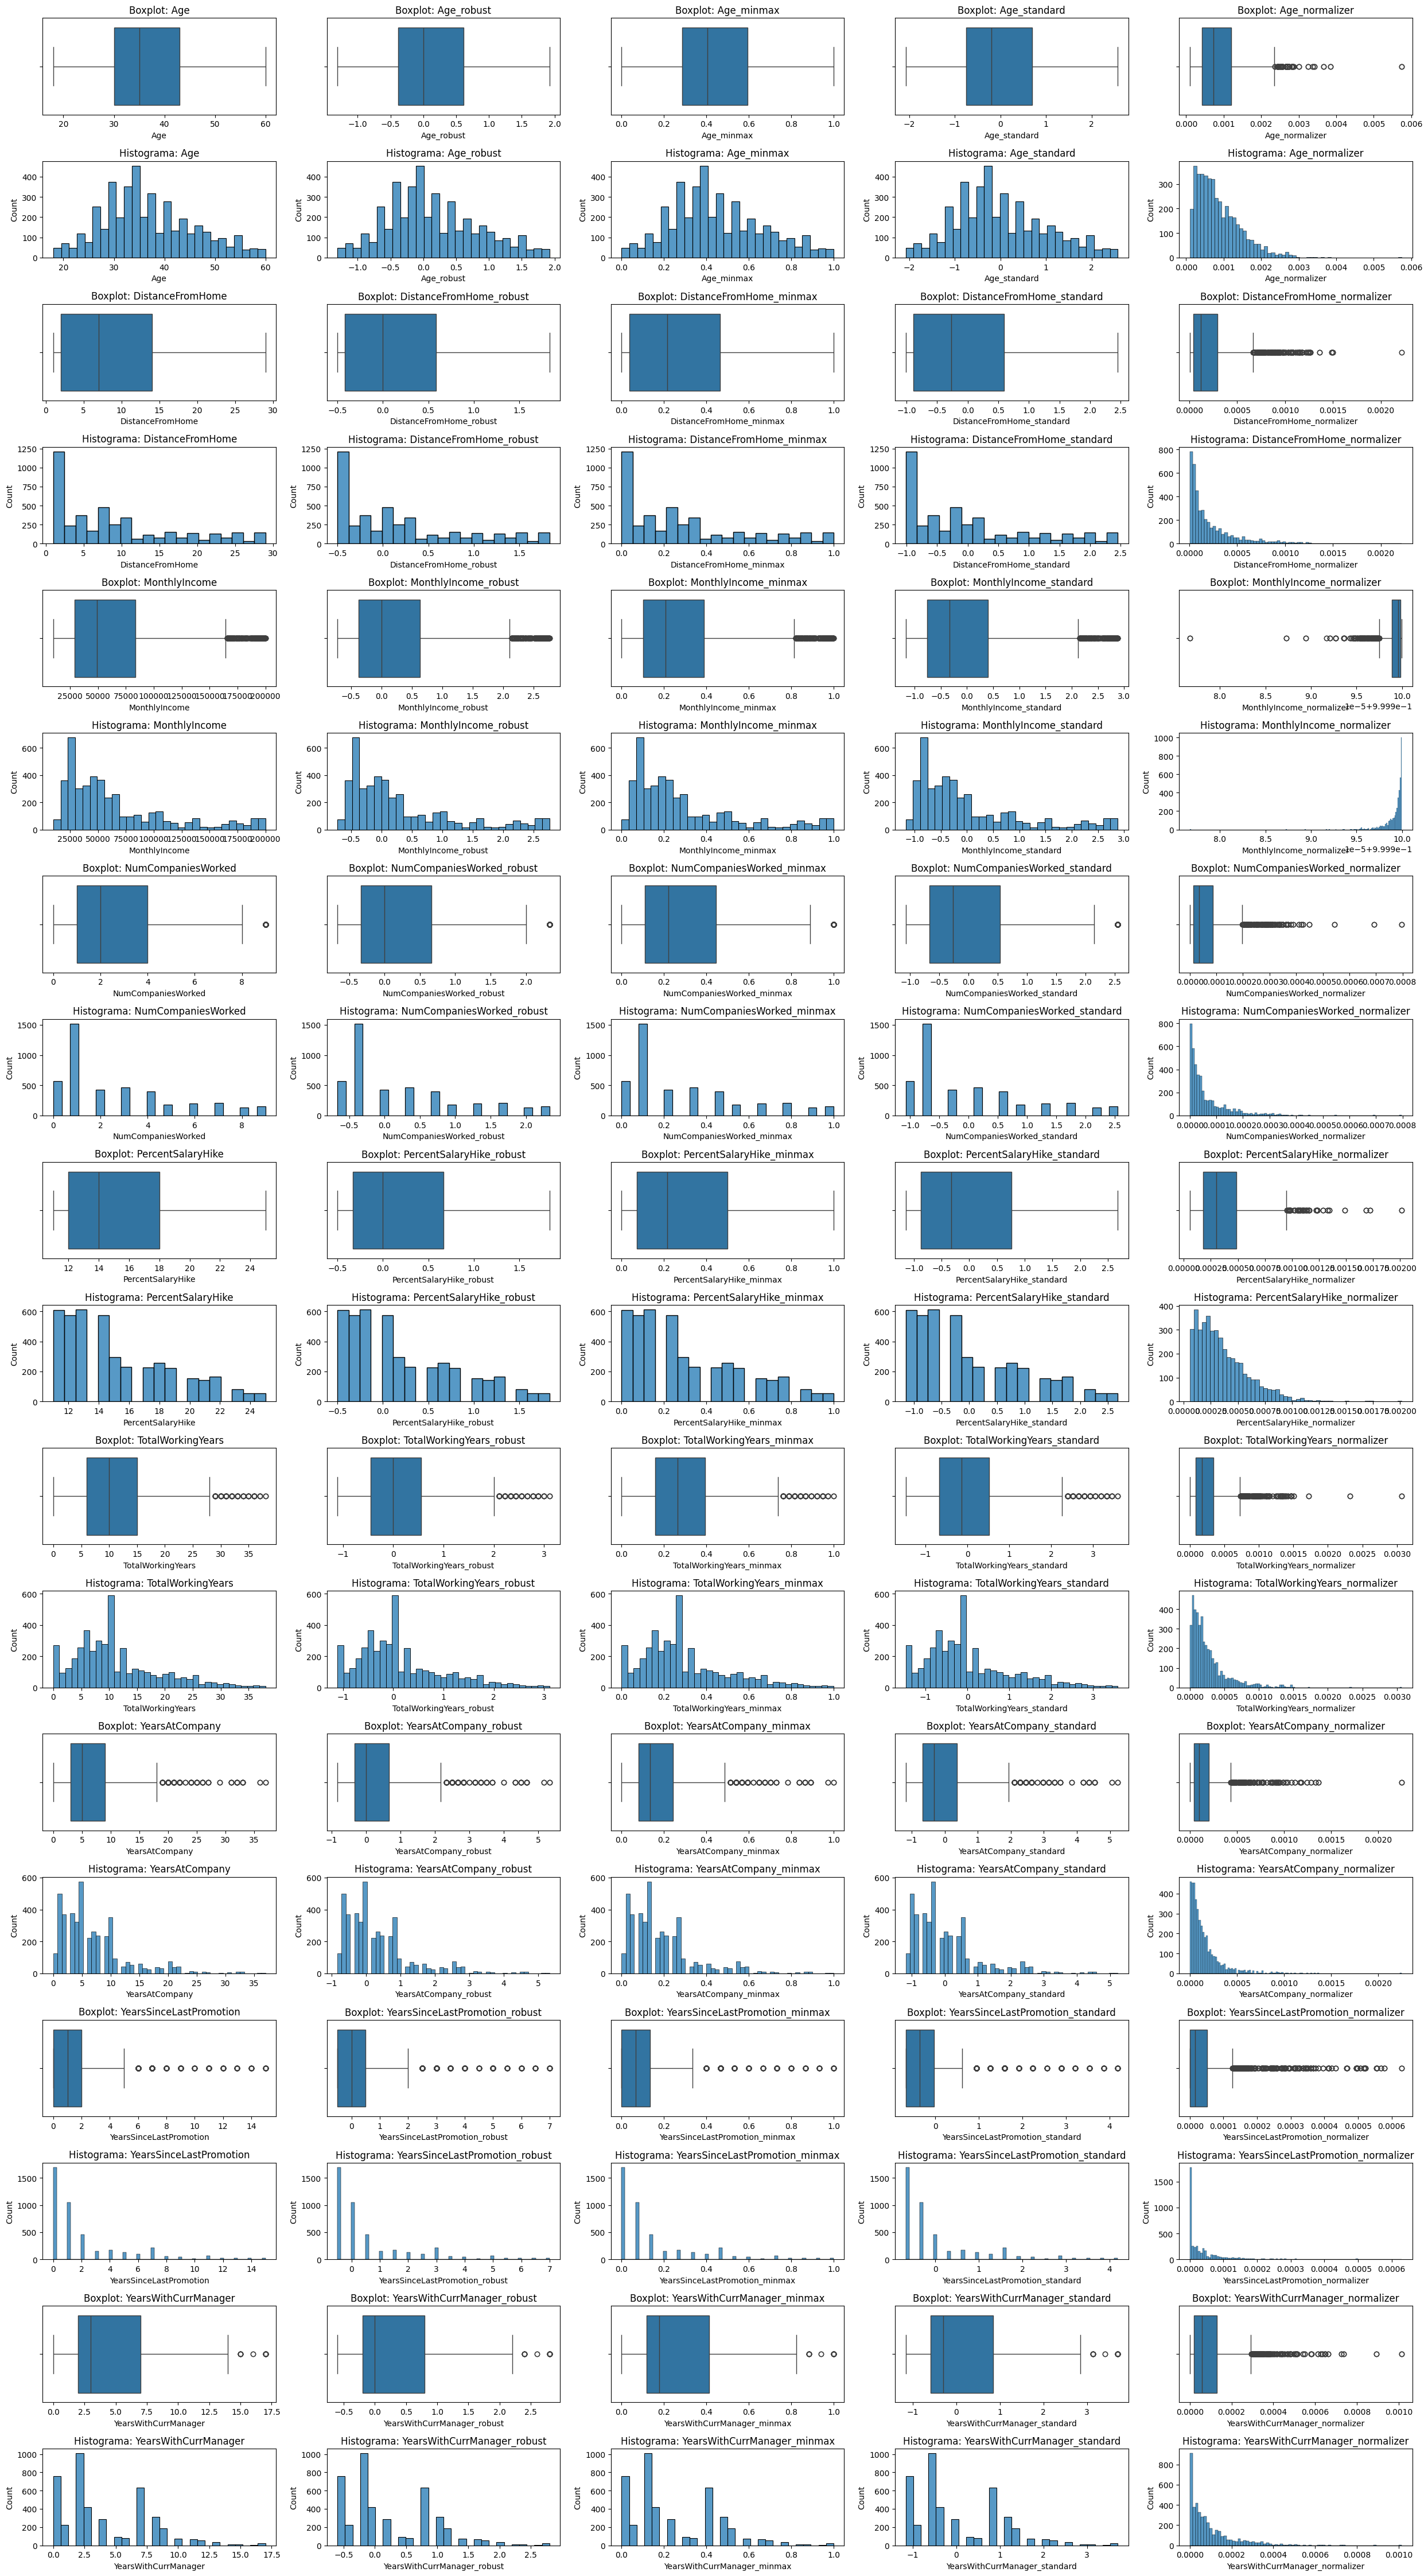

In [13]:
ss.graficar_escaladores(df_escaladores_graf, ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], ['Age_robust',
       'DistanceFromHome_robust', 'MonthlyIncome_robust',
       'NumCompaniesWorked_robust', 'PercentSalaryHike_robust',
       'TotalWorkingYears_robust', 'YearsAtCompany_robust',
       'YearsSinceLastPromotion_robust', 'YearsWithCurrManager_robust',
       'Age_minmax', 'DistanceFromHome_minmax', 'MonthlyIncome_minmax',
       'NumCompaniesWorked_minmax', 'PercentSalaryHike_minmax',
       'TotalWorkingYears_minmax', 'YearsAtCompany_minmax',
       'YearsSinceLastPromotion_minmax', 'YearsWithCurrManager_minmax',
       'Age_standard', 'DistanceFromHome_standard', 'MonthlyIncome_standard',
       'NumCompaniesWorked_standard', 'PercentSalaryHike_standard',
       'TotalWorkingYears_standard', 'YearsAtCompany_standard',
       'YearsSinceLastPromotion_standard', 'YearsWithCurrManager_standard',
       'Age_normalizer', 'DistanceFromHome_normalizer',
       'MonthlyIncome_normalizer', 'NumCompaniesWorked_normalizer',
       'PercentSalaryHike_normalizer', 'TotalWorkingYears_normalizer',
       'YearsAtCompany_normalizer', 'YearsSinceLastPromotion_normalizer',
       'YearsWithCurrManager_normalizer'])

- Nos quedaremos con el StandardScaler, dado que, en las gráficas no se observan grandes diferencias y, lo que interesa en este caso es minimizar -"suavizar"- las diferencias.

In [14]:
df_standard = ss.aplicar_escaladores(df, ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], [StandardScaler()])
df_standard.head(1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age_standard,DistanceFromHome_standard,MonthlyIncome_standard,NumCompaniesWorked_standard,PercentSalaryHike_standard,TotalWorkingYears_standard,YearsAtCompany_standard,YearsSinceLastPromotion_standard,YearsWithCurrManager_standard
0,51,0,0.16162790697674417,0.16162790697674417,6,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,131160,1.0,11,0.16162790697674417,1.0,0.16162790697674417,1,0,0,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,1.5751,-0.394644,1.410991,-0.674128,-1.148536,-1.341391,-1.00916,-0.68189,-1.163816


- Eliminamos las columnas originales.

In [15]:
df_standard.drop(columns = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], inplace=True)
df_standard.head(1)

,Attrition,BusinessTravel,Department,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age_standard,DistanceFromHome_standard,MonthlyIncome_standard,NumCompaniesWorked_standard,PercentSalaryHike_standard,TotalWorkingYears_standard,YearsAtCompany_standard,YearsSinceLastPromotion_standard,YearsWithCurrManager_standard
0,0,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,0.16162790697674417,1.5751,-0.394644,1.410991,-0.674128,-1.148536,-1.341391,-1.00916,-0.68189,-1.163816


In [ ]:
with open('../datos/pickles_transformados/modelo1/df_estandarizado.pkl', 'wb') as f:
    pickle.dump(df_standard, f)